[13 34 21 ... 38 38 38]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


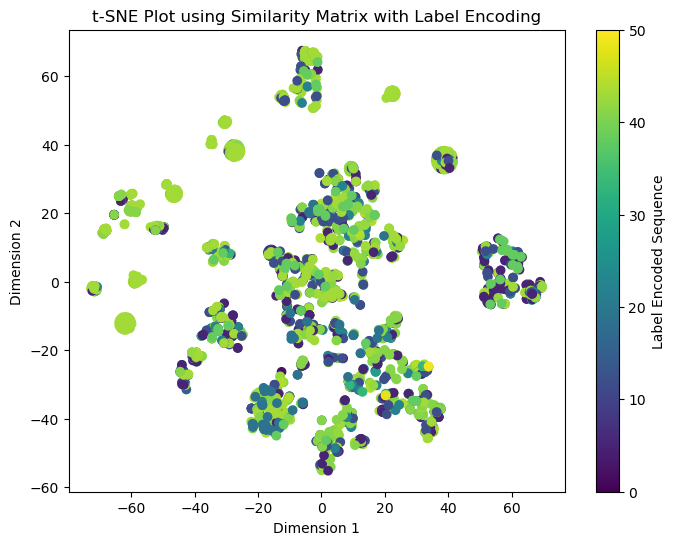

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# 加载相似矩阵
similarity_matrix = np.load('alpha_distance_mouse_matrix.npy')

# 加载包含序列特征的数据集
data = pd.read_csv("data_alpha.csv")  # 替换 "your_data.csv" 为您的实际数据文件路径

# 提取序列特征 (antigen.epitope)
sequences = data['antigen.epitope']

# 对序列特征进行标签编码
encoder = LabelEncoder()
sequences_encoded = encoder.fit_transform(sequences)
print(sequences_encoded)

# 进行 t-SNE 降维
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(similarity_matrix)

# 可视化 t-SNE 降维结果，用标签编码后的序列特征进行着色
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=sequences_encoded, cmap='viridis')
plt.colorbar(label='Label Encoded Sequence')
plt.title('t-SNE Plot using Similarity Matrix with Label Encoding')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()



In [10]:
data

,Unnamed: 0,complex.id,gene,cdr3,v.segm,j.segm,species,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
0,1269,105,TRA,CAATGSFNKLTF,TRAV14D-2*01,NaN,MusMusculus,GNSHRGAIEWEGIESG,Ovotransferrin,GallusGallus,3
1,1270,105,TRB,CASGGQGRAEQFF,TRBV13-2*01,TRBJ2-1*01,MusMusculus,GNSHRGAIEWEGIESG,Ovotransferrin,GallusGallus,3
2,1271,106,TRA,CAMRGDYGGSGNKLIF,TRAV16*01,TRAJ32*01,MusMusculus,INFDFNTI,Kctd20,MusMusculus,3
3,1272,106,TRB,CTCSADRVGNTLYF,TRBV1*01,TRBJ1-3*01,MusMusculus,INFDFNTI,Kctd20,MusMusculus,3
4,1275,108,TRA,CAVSGFASALTF,TRAV9-4*01,TRAJ35*01,MusMusculus,SIYRYYGL,Synthetic,Synthetic,3
...,...,...,...,...,...,...,...,...,...,...,...
5318,92643,0,TRB,CASSDWGSAETLYF,TRBV13-3*01,TRBJ2-3*01,MusMusculus,SQLLNAKYL,GAP50,PlasmodiumBerghei,0
5319,92644,0,TRA,CAARGYNQGKLIF,TRAV14-2*01,TRAJ23*01,MusMusculus,SQLLNAKYL,GAP50,PlasmodiumBerghei,1
5320,92645,0,TRA,CATSDTNAYKVIF,TRAV8-2*01,TRAJ30*01,MusMusculus,SQLLNAKYL,GAP50,PlasmodiumBerghei,1
5321,92646,0,TRA,CALSDTGANTGKLTF,TRAV6-5*01,TRAJ52*01,MusMusculus,SQLLNAKYL,GAP50,PlasmodiumBerghei,0


In [12]:
data.isnull().sum()

Unnamed: 0          0
complex.id          0
gene                0
cdr3_a_aa           0
v_a_gene            1
j_a_gene           65
species             0
antigen.epitope     0
antigen.gene        3
antigen.species     0
vdjdb.score         0
count               0
dtype: int64

In [27]:
# TODO block 3
from sklearn.decomposition import PCA
import time

# Initialize PCA with 4 components
pca = PCA(n_components=1000)

time_start = time.time()
# Apply PCA to X_subset
X_pca = pca.fit_transform(similarity_matrix)

# Extract the principal components
#pca_result = pca.components_

print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

PCA done! Time elapsed: 2.6699984073638916 seconds
Variance explained per principal component: [6.26820927e-01 9.24361978e-02 4.97581830e-02 3.50095391e-02
 3.33240798e-02 2.48606326e-02 1.90376366e-02 1.46784222e-02
 1.25601073e-02 1.09123083e-02 1.00968481e-02 6.79170817e-03
 5.95981286e-03 5.04495911e-03 4.52015582e-03 4.13479920e-03
 3.68140191e-03 3.36900949e-03 2.85063436e-03 2.76537258e-03
 2.51510162e-03 1.83484707e-03 1.70061784e-03 1.64609959e-03
 1.49740812e-03 1.39734522e-03 1.20219039e-03 1.17903054e-03
 9.82411715e-04 9.34130930e-04 8.97770473e-04 8.48970739e-04
 7.39809327e-04 6.71192439e-04 6.64024114e-04 5.66193087e-04
 5.47919930e-04 4.90311580e-04 4.73600779e-04 4.55513533e-04
 4.15410756e-04 4.01595933e-04 3.84475467e-04 3.65789480e-04
 3.64798042e-04 3.21599519e-04 3.08660542e-04 2.94792664e-04
 2.73727382e-04 2.70524373e-04 2.54108227e-04 2.31026650e-04
 2.23135107e-04 2.22758115e-04 2.19675358e-04 1.99618452e-04
 1.97081515e-04 1.89271536e-04 1.79222326e-04 1.751

In [28]:
# Utility function to visualize the outputs of PCA and t-SNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 800x800 with 1 Axes>,
 <AxesSubplot:>,
 [Text(112.0419998076724, -543.6495188697968, '0'),
  Text(-632.6931740926345, -5.799303269935017, '1'),
  Text(-612.4172650924497, 51.73593814475844, '2'),
  Text(-547.8920528978063, 239.5052557474175, '3'),
  Text(-69.68922332705677, -33.775369484860235, '4'),
  Text(-712.3726019305436, 152.3428287734654, '5'),
  Text(-756.676985289601, -179.2237032175193, '6'),
  Text(-1575.7817179527606, 600.4338343535495, '7'),
  Text(-422.4326326176196, 37.08054617742538, '8'),
  Text(-321.52999589503384, -244.17658624718484, '9'),
  Text(-1120.74040519496, 129.54651629342592, '10'),
  Text(-140.91845609029343, -503.625375625747, '11'),
  Text(-564.0657465229232, -189.6359348411258, '12'),
  Text(-196.37297181022439, -313.73669950962034, '13'),
  Text(-744.4296667166918, -174.32672340298248, '14'),
  Text(-1649.4956258267905, 589.9000989720039, '15'),
  Text(-738.3918012420517, 349.17300580207575, '16'),
  Text(-650.37577946578, -106.3000241293

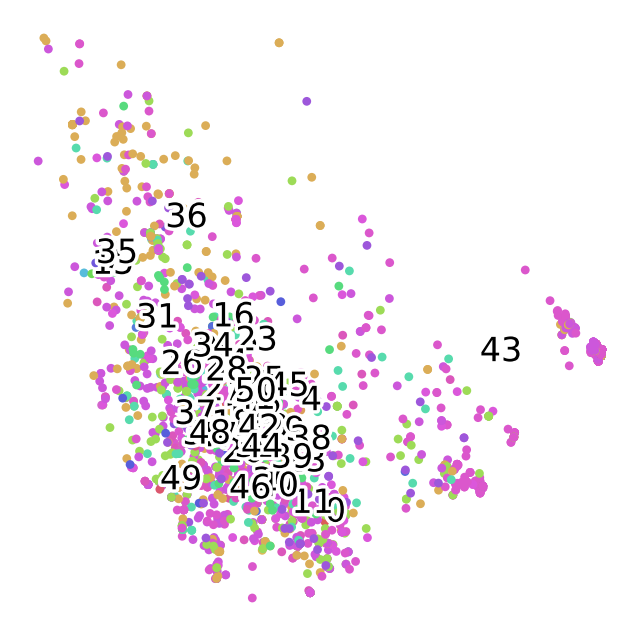

In [29]:
# TODO block 4
pca_df = pd.DataFrame(columns=['pca1', 'pca2', 'pca3', 'pca4'])

pca_df['pca1'] = X_pca[:, 0]
pca_df['pca2'] = X_pca[:, 1]
pca_df['pca3'] = X_pca[:, 2]
pca_df['pca4'] = X_pca[:, 3]

# Select the first two components from the DataFrame
pca_df_subset = pca_df[['pca1', 'pca2']]

# Visualize the PCA output without coloring by labels
fashion_scatter(pca_df_subset.values, colors=sequences_encoded)


In [32]:
# Imports

import time
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

%matplotlib inline

RS = 1729; # Fix the random state for t-SNE. This makes the lab results reproducible.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE done! Time elapsed: 8.628682136535645 seconds


(<Figure size 800x800 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-19.226063, -0.2145282, '0'),
  Text(30.255657, 2.6192875, '1'),
  Text(6.015641, 2.7179086, '2'),
  Text(-11.7771435, -8.829477, '3'),
  Text(-10.030049, -4.6041584, '4'),
  Text(4.855587, -7.5154037, '5'),
  Text(-4.001766, 3.3343, '6'),
  Text(27.876526, -7.348521, '7'),
  Text(15.799681, 0.9646901, '8'),
  Text(16.25316, 27.76446, '9'),
  Text(37.336708, -6.174536, '10'),
  Text(-24.664066, 3.03897, '11'),
  Text(3.4488904, -3.148725, '12'),
  Text(7.6428633, -0.95119125, '13'),
  Text(22.123707, -28.914127, '14'),
  Text(41.692005, -36.012196, '15'),
  Text(25.612337, -37.845886, '16'),
  Text(22.710604, -35.92497, '17'),
  Text(22.093996, -28.888634, '18'),
  Text(19.243895, 23.400394, '19'),
  Text(22.411875, -35.659496, '20'),
  Text(14.6368265, -0.5111939, '21'),
  Text(1.9064325, -5.0491624, '22'),
  Text(-11.76838, -8.836657, '23'),
  Text(18.24431, 5.4463296, '24'),
  Text(-3.4515467, -4.4400535, '25'),
  Text(37.3

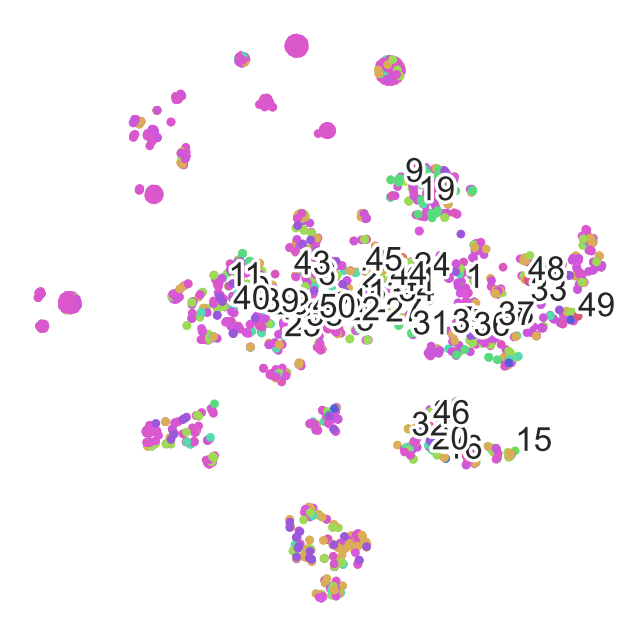

In [37]:
from sklearn.manifold import TSNE
import time

# Assuming X_subset is defined as a subset of your data
# Initialize t-SNE with random state RS
tsne = TSNE(random_state=RS)

# Start timing
time_start_tsne = time.time()

# Apply t-SNE to X_subset
X_tsne = tsne.fit_transform(similarity_matrix)

# End timing
time_elapsed_tsne = time.time() - time_start_tsne

# Print the time taken for t-SNE
print('t-SNE done! Time elapsed: {} seconds'.format(time_elapsed_tsne))

# Visualize the t-SNE result for the first 1000 data points
fashion_scatter(X_tsne, colors=sequences_encoded)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


UMAP done! Time elapsed: 13.157045364379883 seconds


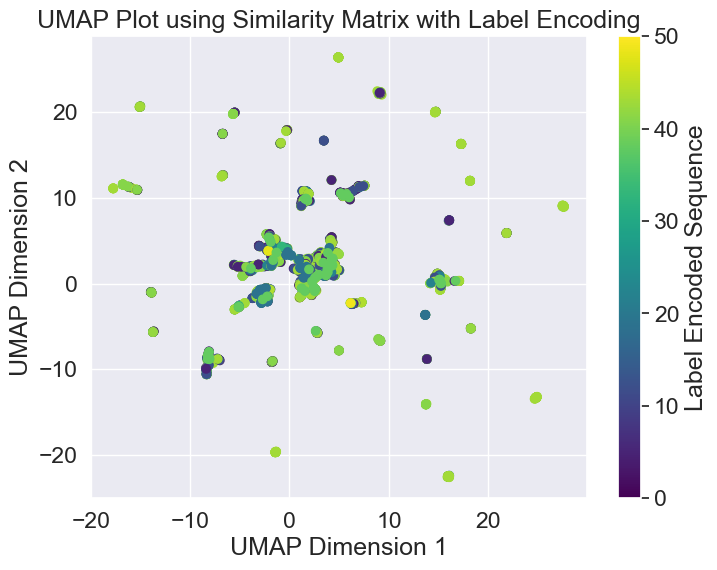

In [35]:
import umap
import numpy as np
import matplotlib.pyplot as plt
# 初始化 UMAP 并进行降维
umap_model = umap.UMAP(random_state=RS)
time_start_umap = time.time()
X_umap = umap_model.fit_transform(similarity_matrix)
time_elapsed_umap = time.time() - time_start_umap

# Print the time taken for UMAP
print('UMAP done! Time elapsed: {} seconds'.format(time_elapsed_umap))

# 可视化 UMAP 降维结果，用标签编码后的序列特征进行着色
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=sequences_encoded, cmap='viridis')
plt.colorbar(label='Label Encoded Sequence')
plt.title('UMAP Plot using Similarity Matrix with Label Encoding')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()